## 岭回归 Ridge Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

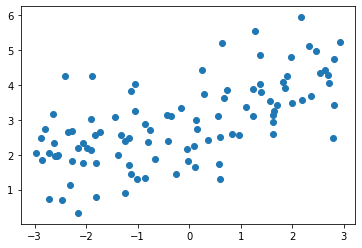

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [6]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

167.9401085999025

In [21]:
# 观察可知20维的多项式回归中，系数太大了
# 因为多项式回归的目标是使MSE尽可能的小。但是会使θ变大
# 所以此时需要加入模型正则化，改变目标函数
# 目标函数加入θ的平方和，使得θ变大的时候目标函数会变大
# θ0不需要，因为θ0不是任何X的系数，对函数没有影响
print(poly_reg["lin_reg"].coef_)

[ 0.00000000e+00  4.51420572e-01  2.33356109e+01  1.42846232e+01
 -6.53846205e+02 -2.53385003e+02  7.60081201e+03  2.36383160e+03
 -4.66569540e+04 -1.22026494e+04  1.67921957e+05  3.63834773e+04
 -3.72244181e+05 -6.41186496e+04  5.14730775e+05  6.58881348e+04
 -4.32752964e+05 -3.64946916e+04  2.02479125e+05  8.42103402e+03
 -4.04490051e+04]


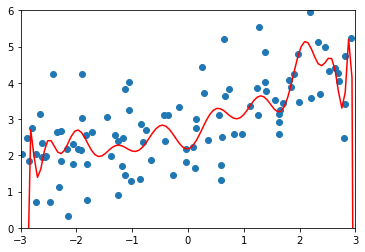

In [8]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

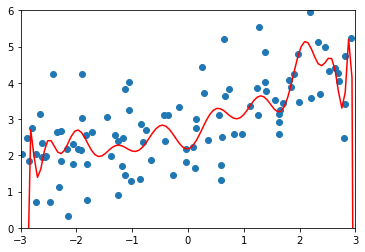

In [9]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

plot_model(poly_reg)

### 使用岭回归

In [10]:
# α使新的超参数。α=0的时候没有加入模型正则化，α如果特别大的时候目标函数的优化任务就是让每一个θi都极可能小
# 实际是想让MSE和θ平方和尽可能平衡
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [11]:
# 因为θ会变得很大，所以α取比较小的值也行
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.3233492754136291

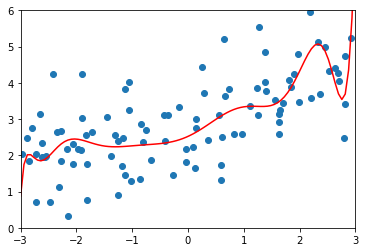

In [12]:
plot_model(ridge1_reg)

In [13]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1888759304218461

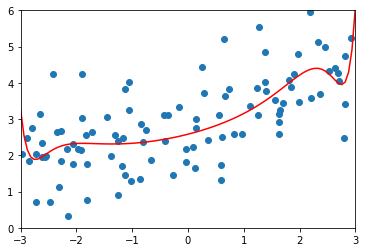

In [14]:
plot_model(ridge2_reg)

In [15]:
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.3196456113086197

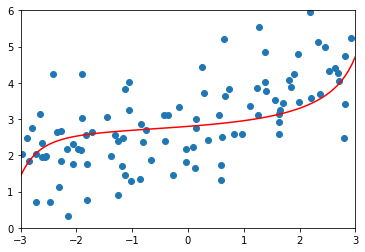

In [16]:
plot_model(ridge3_reg)

In [17]:
ridge4_reg = RidgeRegression(20, 10000000)
ridge4_reg.fit(X_train, y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

1.8408455590998372

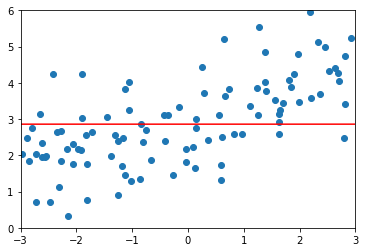

In [22]:
plot_model(ridge4_reg)

In [23]:
# θ基本为0了
print(ridge4_reg["ridge_reg"].coef_)

[0.00000000e+00 5.36901360e-06 1.19754760e-06 4.77098756e-06
 1.00698099e-06 4.23046101e-06 9.16406798e-07 3.86509084e-06
 9.06192581e-07 3.61690719e-06 9.44330291e-07 3.44313395e-06
 1.00860201e-06 3.31693796e-06 1.08565371e-06 3.22165048e-06
 1.16762935e-06 3.14677927e-06 1.24989992e-06 3.08560039e-06
 1.32973897e-06]
